In [155]:

#from Tools import *
import numpy as np
import seaborn as sns
import pandas as pd
from random import Random
import random
from scipy.interpolate import interp1d
from scipy.stats import rv_continuous
from astropy.io import ascii
import emcee
import pathos.multiprocessing as multiproc
from multiprocessing import Pool
import corner
from IPython.display import display, Math
from astropy import cosmology
import matplotlib.pyplot as plt
from astropy.io import fits

In [156]:
Catalog=ascii.read('../A-Catalogs/Binospec-Candels.cat')
mask=np.isnan(Catalog["EWLya"])==False
narrow=Catalog[Catalog["LyaFWHM_int"]>800.]

In [157]:
#Narrow:

#z6_GND_35647 Very close to sky line
#z5_GNW_11701 SN = 4.2
#z5_GND_32413 Noisy SN=6
#z5_GND_10047 Noisy SN=6
#z8_GND_35384 Cut by skyline
#z6_GNW_21823 Cut by skyline	

#Broad:

#z5_GNW_20906	: Hard to say, if its a line, there is high signal but extremely noisy
#z5_GNW_11014   : Hard to say, if its a line, there is high signal but extremely noisy


In [158]:
narrow

id_candels,id_charlotte,ra_candels,dec_candels,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F105W_FLUX,WFC3_F125W_FLUX,WFC3_F140W_FLUX,WFC3_F160W_FLUX,KPNO_U_FLUXERR,LBC_U_FLUXERR,ACS_F435W_FLUXERR,ACS_F606W_FLUXERR,ACS_F775W_FLUXERR,ACS_F814W_FLUXERR,ACS_F850LP_FLUXERR,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,z,LyaFlux,LyaErr,LyaFWHM,Skewness,photoz,IDFink,FluxLim,Type,HaFlux,dHaFlux,EWHa,dEWHa,HaFWHM,dHaFWHM,fesc,dfesc,voff,dvoff,zsys,Muv,dMuv,slope,dslope,EWLya,dEWLya,LyaFWHM_int,dLyaFWHM_int,Asymmetry,inFresco,line,f090w_mag_aper_1,f090w_magerr_aper_1,f115w_mag_aper_1,f115w_magerr_aper_1,f150w_mag_aper_1,f150w_magerr_aper_1,f200w_mag_aper_1,f200w_magerr_aper_1,f277w_mag_aper_1,f277w_magerr_aper_1,f335m_mag_aper_1,f335m_magerr_aper_1,f356w_mag_aper_1,f356w_magerr_aper_1,f410m_mag_aper_1,f410m_magerr_aper_1,f444w_mag_aper_1,f444w_magerr_aper_1,Slit_loss?,f090w_mag_aper_2,f090w_magerr_aper_2,f115w_mag_aper_2,f115w_magerr_aper_2,f150w_mag_aper_2,f150w_magerr_aper_2,f200w_mag_aper_2,f200w_magerr_aper_2,f277w_mag_aper_2,f277w_magerr_aper_2,f335m_mag_aper_2,f335m_magerr_aper_2,f356w_mag_aper_2,f356w_magerr_aper_2,f410m_mag_aper_2,f410m_magerr_aper_2,f444w_mag_aper_2,f444w_magerr_aper_2,f090w_tot_2,f090w_etot_2,f115w_tot_2,f115w_etot_2,f150w_tot_2,f150w_etot_2,f200w_tot_2,f200w_etot_2,f277w_tot_2,f277w_etot_2,f335m_tot_2,f335m_etot_2,f356w_tot_2,f356w_etot_2,f410m_tot_2,f410m_etot_2,f444w_tot_2,f444w_etot_2,f435w_tot_2,f435w_etot_2,f606w_tot_2,f606w_etot_2,f770w_tot_2,f770w_etot_2,f775w_tot_2,f775w_etot_2,f814w_tot_2,f814w_etot_2,f850lp_tot_2,f850lp_etot_2,f105w_tot_2,f105w_etot_2,f110w_tot_2,f110w_etot_2,f125w_tot_2,f125w_etot_2,f140w_tot_2,f140w_etot_2,f160w_tot_2,f160w_etot_2,f_F160W,e_F160W,f_U,e_U,f_F435W,e_F435W,f_B,e_B,f_G,e_G,f_V,e_V,f_F606W,e_F606W,f_R,e_R,f_Rs,e_Rs,f_I,e_I,f_F775W,e_F775W,f_Z,e_Z,f_F850LP,e_F850LP,f_F125W,e_F125W,f_J,e_J,f_F140W,e_F140W,f_H,e_H,dLyaFWHM
int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [163]:
Catalog=ascii.read('../A-Catalogs/Binospec-Candels.cat')
mask=np.isnan(Catalog["EWLya"])==False
mask=(Catalog["EWLya"]>500) 
Red=Catalog[mask]

In [164]:
list(Red["id_charlotte"])

['z6_GND_29625']

id_candels id_charlotte  ra_candels  dec_candels    KPNO_U_FLUX    LBC_U_FLUX ACS_F435W_FLUX   ACS_F606W_FLUX     ACS_F775W_FLUX    ACS_F814W_FLUX    ACS_F850LP_FLUX   WFC3_F105W_FLUX   WFC3_F125W_FLUX   WFC3_F140W_FLUX    WFC3_F160W_FLUX    KPNO_U_FLUXERR   LBC_U_FLUXERR ACS_F435W_FLUXERR ACS_F606W_FLUXERR ACS_F775W_FLUXERR  ACS_F814W_FLUXERR  ACS_F850LP_FLUXERR  WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR WFC3_F160W_FLUXERR         z               LyaFlux              LyaErr            LyaFWHM             Skewness       photoz IDFink FluxLim Type HaFlux dHaFlux EWHa dEWHa HaFWHM dHaFWHM fesc dfesc voff dvoff zsys        Muv                dMuv               slope              dslope             EWLya              dEWLya          LyaFWHM_int       dLyaFWHM_int        Asymmetry      inFresco line f090w_mag_aper_1 f090w_magerr_aper_1 f115w_mag_aper_1 f115w_magerr_aper_1 f150w_mag_aper_1 f150w_magerr_aper_1 f200w_mag_aper_1 f200w_magerr_aper_1 f277w_mag_aper_1 f277w_magerr_

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


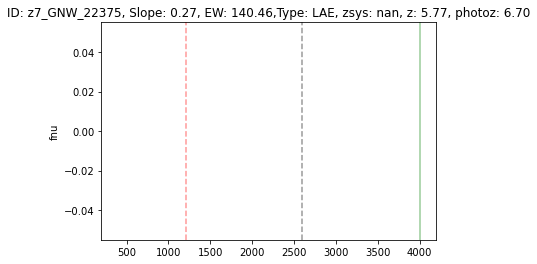

id_candels id_charlotte  ra_candels  dec_candels KPNO_U_FLUX    LBC_U_FLUX      ACS_F435W_FLUX    ACS_F606W_FLUX     ACS_F775W_FLUX     ACS_F814W_FLUX    ACS_F850LP_FLUX    WFC3_F105W_FLUX    WFC3_F125W_FLUX   WFC3_F140W_FLUX  WFC3_F160W_FLUX  KPNO_U_FLUXERR   LBC_U_FLUXERR   ACS_F435W_FLUXERR  ACS_F606W_FLUXERR   ACS_F775W_FLUXERR  ACS_F814W_FLUXERR  ACS_F850LP_FLUXERR  WFC3_F105W_FLUXERR WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR  WFC3_F160W_FLUXERR         z               LyaFlux             LyaErr            LyaFWHM             Skewness      photoz IDFink FluxLim Type HaFlux dHaFlux EWHa dEWHa HaFWHM dHaFWHM fesc dfesc voff dvoff zsys         Muv                 dMuv              slope              dslope             EWLya              dEWLya          LyaFWHM_int        dLyaFWHM_int       Asymmetry     inFresco line f090w_mag_aper_1 f090w_magerr_aper_1 f115w_mag_aper_1 f115w_magerr_aper_1 f150w_mag_aper_1 f150w_magerr_aper_1 f200w_mag_aper_1 f200w_magerr_aper_1 f277w_mag_aper_1 f277w_ma

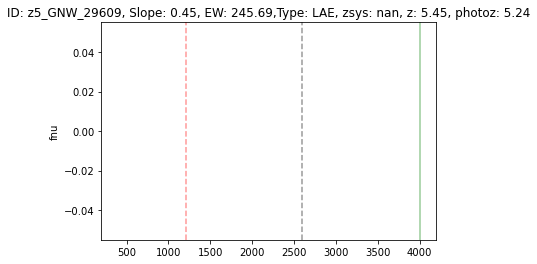

id_candels id_charlotte  ra_candels  dec_candels KPNO_U_FLUX LBC_U_FLUX   ACS_F435W_FLUX   ACS_F606W_FLUX ACS_F775W_FLUX   ACS_F814W_FLUX    ACS_F850LP_FLUX    WFC3_F105W_FLUX    WFC3_F125W_FLUX   WFC3_F140W_FLUX  WFC3_F160W_FLUX  KPNO_U_FLUXERR LBC_U_FLUXERR ACS_F435W_FLUXERR ACS_F606W_FLUXERR ACS_F775W_FLUXERR ACS_F814W_FLUXERR  ACS_F850LP_FLUXERR  WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR  WFC3_F160W_FLUXERR  z  LyaFlux LyaErr LyaFWHM Skewness photoz IDFink       FluxLim          Type   HaFlux dHaFlux EWHa dEWHa HaFWHM dHaFWHM fesc dfesc voff dvoff zsys         Muv                dMuv              slope              dslope             EWLya              dEWLya       LyaFWHM_int dLyaFWHM_int Asymmetry inFresco line f090w_mag_aper_1 f090w_magerr_aper_1 f115w_mag_aper_1 f115w_magerr_aper_1 f150w_mag_aper_1 f150w_magerr_aper_1 f200w_mag_aper_1 f200w_magerr_aper_1 f277w_mag_aper_1 f277w_magerr_aper_1 f335m_mag_aper_1 f335m_magerr_aper_1 f356w_mag_aper_1 f356w_magerr_aper_

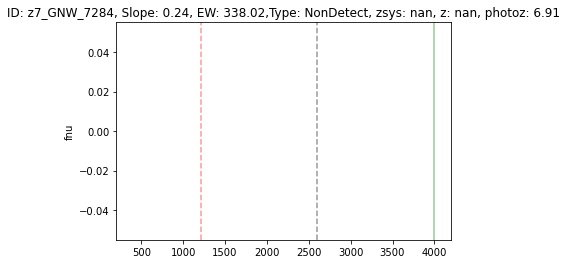

In [161]:

Filters=np.array(["f090w_tot_2","f115w_tot_2","f150w_tot_2","f200w_tot_2","f277w_tot_2","f335m_tot_2","f356w_tot_2","f410m_tot_2","f444w_tot_2",
                  "f435w_tot_2","f606w_tot_2","f775w_tot_2","f814w_tot_2","f850lp_tot_2","f105w_tot_2","f110w_tot_2","f125w_tot_2","f140w_tot_2","f160w_tot_2"])
Cwaves_JADES  = [8984,11433.62,14872.56,19680.41,27278.58,33537.23,35287.04,40723.18,43504.26,4360.06 , 6035.73, 7757, 8129.21, 9080.26,10542.47, 11696.34 , 12503.91 , 13983.36 , 15437.71]
#EffW    = [ [8098.0,9870], [10406.1,12461.1] ,[13427.345,16317.775],[17585.215,21775.605], [23971.275,30585.885],[31842.52,35231.94],[31667.39,38906.69],[38591.75,42854.61],[38166.26,48842.26],[3610.23,4883.77	],[	4634.30,7180.10]    , [6803.72,8631.82]  , [6869.59,9632.01	]  ,[8007.01,10862.13], [8955.2,12130.5] , [8845.,14122.]   , [10853.22, 14141.73] , [11864.94,16133.14] , [13857.70,17003.09]]# , 1098    , 3856     , 1232  ]
Width=[1772.74,2055.13,2890.43,4190.39,6448.30,3389.42,7239.30	,4262.86,10676.00,821.68,1771.88,1379.43,1888.66,1321.98,2371.97 ,3856.85,2674.40,3569.86,2750.15]

EffW = [[Cwave - width, Cwave + width] for Cwave, width in zip(Cwaves_JADES, Width)]

EffW=[ [cwv-efw[0],efw[1]-cwv]for efw,cwv in zip(EffW,Cwaves_JADES)]
EffW=np.transpose(EffW)

def Mag_to_flambda(mag,cwave):
    c=2.99792458E+18 #Speed of light
    Flux=(10**(-(mag+48.6)/2.5))#*(c/cwave**2) # ABmag to flambda
    return Flux

mask=[]
show_plots=True
Galaxy_Name="z5_GNW_12024"
for i,gal in enumerate(Red):

    
    print(gal)

    if gal["zsys"]>0:
        z=gal['zsys']
    elif gal["z"]>0:
        z=gal['z']
    elif gal["photoz"]>0:
        z=gal['photoz']
    
    

    Lya=1215.6
    stop=2600
    Balmer=4000
    Ha=6563
    JADES_mag_names = [key for key in gal.keys() if "_tot" in key]
    #print(JADES_mag_names)
    JADES_magerr_names=[key for key in gal.keys() if "_etot" in key]
    JADES_mag=np.array([Mag_to_flambda(gal[key],c) for key,c in zip(JADES_mag_names,Cwaves_JADES)])
    #for key,c in zip(JADES_mag_names,Cwaves_JADES):
    #    print(key,gal[key],c,Mag_to_flambda(gal[key],c))


    JADES_magerr_plus=np.array([Mag_to_flambda(gal[key]+gal[key2],c) for key,key2,c in zip(JADES_magerr_names,JADES_mag_names,Cwaves_JADES)])-JADES_mag
    JADES_magerr_minus=JADES_mag-np.array([Mag_to_flambda(gal[key2]-gal[key],c) for key,key2,c in zip(JADES_magerr_names,JADES_mag_names,Cwaves_JADES)])
    JADES_magerr=[(JADES_magerr_plus[i]+JADES_magerr_minus[i])/2 for i in range(len(JADES_magerr_plus))]

    if np.isnan(JADES_mag).all():
        mask.append(True)
    else:
        mask.append(False)

    if show_plots==True:
        plt.errorbar(Cwaves_JADES/(1+z),JADES_mag,yerr=JADES_magerr,xerr=[EffW[0]/(1+z),EffW[1]/(1+z)],fmt='o')
        plt.axvline(x=Lya,color='r',alpha=0.4,ls="--")
        plt.axvline(x=Balmer,color='g',alpha=0.4)
        plt.axvline(x=Ha,color='b',alpha=0.4)
        plt.axvline(x=stop,color='k',alpha=0.4,ls="--")
        #print(gal["id_charlotte"])
        for i, txt in enumerate(Filters):
            
            posx = Cwaves_JADES[i]/(1+z)
            posy = JADES_mag[i]
            #print(txt,posx,posy)
            if posx < 4200 and np.isfinite(posx) and np.isfinite(posy):
                
                plt.text(posx+500, posy+posy*0.05   , str(txt), fontsize=8, ha='right')
        plt.title(f"ID: {gal['id_charlotte']}, Slope: {gal['slope']:.2f}, EW: {gal['EWLya']:.2f},Type: {gal['Type']}, zsys: {gal['zsys']:.2f}, z: {gal['z']:.2f}, photoz: {gal['photoz']:.2f}")
        plt.xlim(200,4200)
        #plt.xscale('log')
        plt.ylabel("fnu")
        plt.show()


In [112]:
len(Width)

19

In [63]:
Original_Catalog=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/targets/target_lists/bino_master_cat_2020all.csv")

In [64]:
Original_Catalog

name,ra,dec,priority,type
str19,float64,float64,int64,str6
Hu10_z6_5,189.399719,62.239494,1,TARGET
Hu10_z6_11,189.365982,62.196171,1,TARGET
Hu10_z6_12,189.320312,62.233444,1,TARGET
Hu10_z6_9,189.342285,62.262852,1,TARGET
Hu10_z6_7,189.032761,62.14397,1,TARGET
Hu10_z6_6,189.324554,62.299732,1,TARGET
Hu10_z6_4,189.253998,62.353954,1,TARGET
Stark11_35_22248,189.253998,62.353954,1,TARGET
Hu10_z6_3,189.055939,62.12999,1,TARGET


In [65]:
#Catalog_wrong=ascii.read('../A-Catalogs/Binospec-Candels_wrong_photometry.cat')
Catalog_wrong=ascii.read('../A-Catalogs/Binospec-Candels.cat')
wrong_coordinates=[]    
for gal in Catalog_wrong:
    original_match = Original_Catalog[Original_Catalog['name'] == gal['id_charlotte']]
    if len(original_match) > 0:
        ra = original_match['ra'][0]
        dec = original_match['dec'][0]
        ra1 = gal['ra_candels']
        dec1 = gal['dec_candels']
        ra_diff_arcsec = np.abs(ra - ra1) * 3600
        dec_diff_arcsec = np.abs(dec - dec1) * 3600
        if ra_diff_arcsec > 0.2 or dec_diff_arcsec > 0.2:
            i=i+1
            print(gal["id_charlotte"])
            print(f"RA difference (arcsec): {ra_diff_arcsec}, DEC difference (arcsec): {dec_diff_arcsec}")
            gal["ra_candels"]=ra
            gal["dec_candels"]=dec
            wrong_coordinates.append(gal["id_charlotte"])


#ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)

In [69]:
import xmatch
candels=fits.open("../A-Catalogs/CandlesShards.fit")
f3DHST=ascii.read("../A-Catalogs/goodsn_3dhst.v4.1.cat")


In [48]:
names_filters=["FU-KPNO","FU-LBC","F435W","F606W","F775W","F850LP","F814W","F105W","F125W","F140W","F160W"]
names_errfilter=["e_FU-KPNO","e_FU-LBC","e_F435W","e_F606W","e_F775W","e_F814W","e_F850LP","e_F105W","e_F125W","e_F140W","e_F160W"]

names_our=["KPNO_U_FLUX","LBC_U_FLUX","ACS_F435W_FLUX","ACS_F606W_FLUX","ACS_F775W_FLUX","ACS_F814W_FLUX","ACS_F850LP_FLUX","WFC3_F105W_FLUX","WFC3_F125W_FLUX","WFC3_F140W_FLUX","WFC3_F160W_FLUX"]
names_our_err=["KPNO_U_FLUXERR","LBC_U_FLUXERR","ACS_F435W_FLUXERR","ACS_F606W_FLUXERR","ACS_F775W_FLUXERR","ACS_F814W_FLUXERR","ACS_F850LP_FLUXERR","WFC3_F105W_FLUXERR","WFC3_F125W_FLUXERR","WFC3_F140W_FLUXERR","WFC3_F160W_FLUXERR"]

In [49]:
for gal in Catalog:
    if gal["id_charlotte"] in wrong_coordinates:
        for n in names_our:
            gal[n]=np.nan
        for n in names_our_err:
            gal[n]=np.nan
ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)

In [50]:
def microjanskys_to_abmag(microjanskys):
    return - 2.5 * np.log10(microjanskys / 1e6)+8.9

ab_mag = microjanskys_to_abmag(0.04598)
print(ab_mag)

27.243577582666852


In [84]:
ra_tofix=[]
dec_tofix=[]

ra_tofix.append(189.055939)
dec_tofix.append(62.129990)
        

In [88]:
import xmatch
idx,d2d=xmatch.xmatch(ra_tofix,dec_tofix, candels[1].data["RAJ2000"]  ,candels[1].data["DEJ2000"])  
mask=[]
for i,d in zip(idx,d2d):
    if d.value<(0.2/3600.):
        mask.append(True)
    else:
        mask.append(False)


In [99]:
for gal in Catalog:
    if gal["id_charlotte"]=="Hu10_z6_3":
        gal["ACS_F850LP_FLUX"]=25.99
        gal["ACS_F850LP_FLUXERR"]=0.2
        gal["ACS_F775W_FLUX"]=26.61
        gal["ACS_F775W_FLUXERR"]=0.2
        gal["ACS_F606W_FLUX"]=28.35
        gal["ACS_F606W_FLUXERR"]=0.2
        print(gal)
ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)


id_candels id_charlotte ra_candels dec_candels KPNO_U_FLUX LBC_U_FLUX ACS_F435W_FLUX ACS_F606W_FLUX ACS_F775W_FLUX ACS_F814W_FLUX ACS_F850LP_FLUX WFC3_F105W_FLUX WFC3_F125W_FLUX WFC3_F140W_FLUX WFC3_F160W_FLUX KPNO_U_FLUXERR LBC_U_FLUXERR ACS_F435W_FLUXERR ACS_F606W_FLUXERR ACS_F775W_FLUXERR ACS_F814W_FLUXERR ACS_F850LP_FLUXERR WFC3_F105W_FLUXERR WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR WFC3_F160W_FLUXERR        z               LyaFlux              LyaErr            LyaFWHM            Skewness            photoz         IDFink   FluxLim Type HaFlux dHaFlux EWHa dEWHa HaFWHM dHaFWHM fesc dfesc voff dvoff zsys Muv dMuv slope dslope EWLya dEWLya    LyaFWHM_int       dLyaFWHM_int       Asymmetry      inFresco line f090w_mag_aper_1 f090w_magerr_aper_1 f115w_mag_aper_1 f115w_magerr_aper_1 f150w_mag_aper_1 f150w_magerr_aper_1 f200w_mag_aper_1 f200w_magerr_aper_1 f277w_mag_aper_1 f277w_magerr_aper_1 f335m_mag_aper_1 f335m_magerr_aper_1 f356w_mag_aper_1 f356w_magerr_aper_1 f410m_mag_aper_1 f410m_ma

In [57]:
ra_tofix=[]
dec_tofix=[]
for gal in Catalog:
    if gal["id_charlotte"] in wrong_coordinates:
        ra_tofix.append(gal["ra_candels"])
        dec_tofix.append(gal["dec_candels"])
        

idx,d2d=xmatch.xmatch(ra_tofix,dec_tofix, candels[1].data["RAJ2000"]  ,candels[1].data["DEJ2000"])  
mask=[]
for i,d in zip(idx,d2d):
    if d.value<(0.2/3600.):
        mask.append(True)
    else:
        mask.append(False)



for i,name in enumerate(wrong_coordinates[mask]):
    print(name)
    for gal in Catalog:
        if gal["id_charlotte"]==name:
            print(gal["id_charlotte"])
            for n,nn,en,enn in zip(names_our,names_filters,names_our_err,names_errfilter): 
                flux=candels[1].data[nn][idx[mask][i]]
                err=candels[1].data[enn][idx[mask][i]]
                if flux==0.0:
                    gal[n]=np.nan
                    gal[en]=np.nan
                else:
                    ab_mag = microjanskys_to_abmag(flux)
                    gal[n]=ab_mag
                    ab_mag_err_plus=ab_mag-microjanskys_to_abmag(flux+err)
                    ab_mag_err_minus=microjanskys_to_abmag(flux-err)-ab_mag
                    gal[en]=(ab_mag_err_plus+ab_mag_err_minus)/2
            print(gal)
            
ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)

idx,d2d=xmatch.xmatch(ra_tofix,dec_tofix, f3DHST["ra"]  ,f3DHST["dec"])  
mask=[]
for i,d in zip(idx,d2d):
    if d.value<(0.2/3600.):
        mask.append(True)
    else:
        mask.append(False)
mask=np.array(mask)
wrong_coordinates=np.array(wrong_coordinates)
print(len(np.array(wrong_coordinates)[mask]))

z6_GND_20879
z6_GND_20879
id_candels id_charlotte ra_candels dec_candels    KPNO_U_FLUX         LBC_U_FLUX       ACS_F435W_FLUX     ACS_F606W_FLUX    ACS_F775W_FLUX    ACS_F814W_FLUX    ACS_F850LP_FLUX    WFC3_F105W_FLUX    WFC3_F125W_FLUX    WFC3_F140W_FLUX    WFC3_F160W_FLUX    KPNO_U_FLUXERR   LBC_U_FLUXERR ACS_F435W_FLUXERR  ACS_F606W_FLUXERR  ACS_F775W_FLUXERR   ACS_F814W_FLUXERR  ACS_F850LP_FLUXERR  WFC3_F105W_FLUXERR  WFC3_F125W_FLUXERR WFC3_F140W_FLUXERR  WFC3_F160W_FLUXERR  z  LyaFlux LyaErr LyaFWHM Skewness photoz IDFink       FluxLim          Type          HaFlux       dHaFlux        EWHa       dEWHa HaFWHM dHaFWHM        fesc        dfesc voff dvoff zsys        Muv                 dMuv              slope               dslope             EWLya             dEWLya       LyaFWHM_int dLyaFWHM_int Asymmetry inFresco line  f090w_mag_aper_1 f090w_magerr_aper_1  f115w_mag_aper_1  f115w_magerr_aper_1   f150w_mag_aper_1  f150w_magerr_aper_1 f200w_mag_aper_1 f200w_magerr_aper_1 f277w_m

<ipython-input-50-9857ef441ae9>:2: RuntimeWarning: invalid value encountered in log10
  return - 2.5 * np.log10(microjanskys / 1e6)+8.9


In [270]:
for gal in Catalog:
    if gal["id_charlotte"] in np.array(wrong_coordinates)[~mask]:
        print(gal["id_charlotte"],gal["Type"])

z6_GNW_25971 LAE
z6_GNW_23350 LAE
z5_GNW_12024 LAE
z6_GND_25736 NonDetect
z6_GND_36553 LAE
z5_GND_7766 LAE
z7_GNW_28182 NonDetect
z7_GNW_11595 NonDetect
z5_GND_36668 NonDetect
z5_GNW_30244 NonDetect
z5_GNW_23086 NonDetect
z5_GND_26806 NonDetect
z5_GND_9333 NonDetect
z6_GND_40374 NonDetect
Stark11_43_3982 LAE


SN(B)= nan  and  1.6146803765240065  or  0.7570542118961533
z7_GNW_22375


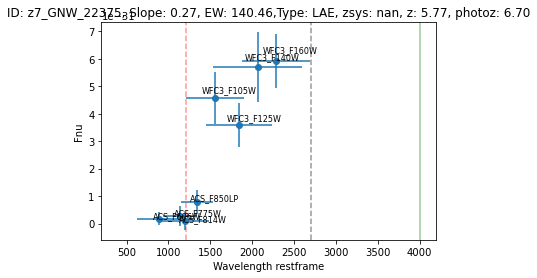

SN(B)= 0.20171306017696106  and  3.1528406769477257  or  1.1235727479549515
z5_GNW_29609


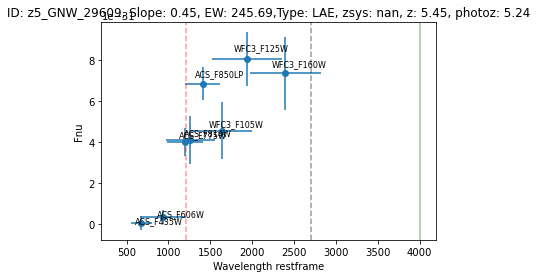

SN(B)= 0.29599391437387484  and  nan  or  nan
z7_GNW_7284


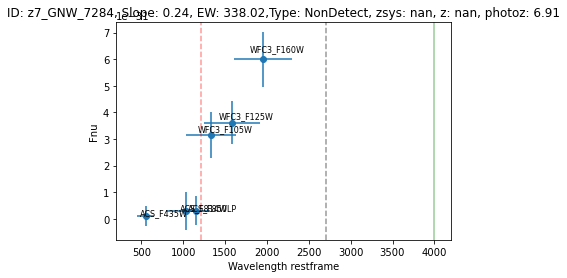

In [162]:
flts=["ACS_F435W","ACS_F606W","ACS_F775W","ACS_F814W","ACS_F850LP","WFC3_F105W","WFC3_F125W","WFC3_F140W","WFC3_F160W"]#,"555","110","625"] 
Cwaves_CANDLES  = [ 	4360.06  , 6035.73 , 7730.77 ,8129.21,9080.26,10542.47 ,  12503.91 , 13983.36 , 15437.71 ]# , 5413.32 , 11696.34 , 6323.81   ]
Width=[821.68,1771.88,1379.43,1888.66,1321.98,2371.97 ,2674.40,3569.86,2750.15]

EffW = [[Cwave - width, Cwave + width] for Cwave, width in zip(Cwaves_CANDLES,Width)]

EffW=[ [cwv-efw[0],efw[1]-cwv]for efw,cwv in zip(EffW,Cwaves_CANDLES)]
EffW=np.transpose(EffW)
CANDLES_mag_names=[name+"_FLUX" for name in flts]
CANDLES_magerr_names=[name+"_FLUXERR" for name in flts]

galaxy_names_JADES = ["z6_GNW_25971", "z6_GND_29564", "z6_GND_25736", "z6_GND_14309", "z6_GND_44248",
    "z7_GND_15642", "z5_GND_15899", "z5_GND_9333", "z5_GND_42576", "Stark11_43_3982",
    "Jung18_z6_GND_5752"]

galaxy_names_CANDLES=["z6_GNW_6440", "z6_GNW_1169", "z6_GNW_10421", "z6_GNW_14478",
    "z7_GNW_28182", "z7_GNW_11595", "z5_GNW_23086", "Hu10_z6_3", "Jung18_z6_GND_5752"]

galaxies_names=galaxy_names_JADES+galaxy_names_CANDLES

show_plots=True
Galaxy_Name="Hu10_z6_3"
for gal in Red:
        


    if gal["zsys"]>0:
        z=gal['zsys']
    elif gal["z"]>0:
        z=gal['z']
    elif gal["photoz"]>0:
        z=gal['photoz']
    
    
    for key in CANDLES_mag_names + CANDLES_magerr_names:
        if gal[key] == -99.0:
            gal[key] = np.nan
            
    Lya=1215.6
    stop=2700
    Balmer=4000
    Ha=6563
    CANDLES_mag_names = [name+"_FLUX" for name in flts]
    CANDLES_magerr_names=[name+"_FLUXERR" for name in flts]


    CANDLES_mag_orig=np.array([gal[key] for key,c in zip(CANDLES_mag_names,Cwaves_CANDLES)])

    CANDLES_mag=np.array([Mag_to_flambda(gal[key],c) for key,c in zip(CANDLES_mag_names,Cwaves_CANDLES)])
    CANDLES_magerr_plus=np.array([Mag_to_flambda(gal[key2]-gal[key],c) for key,key2,c in zip(CANDLES_magerr_names,CANDLES_mag_names,Cwaves_CANDLES)])-CANDLES_mag
    CANDLES_magerr_minus=CANDLES_mag-np.array([Mag_to_flambda(gal[key2]+gal[key],c) for key,key2,c in zip(CANDLES_magerr_names,CANDLES_mag_names,Cwaves_CANDLES)])
    CANDLES_magerr=[(CANDLES_magerr_plus[i]+CANDLES_magerr_minus[i])/2 for i in range(len(CANDLES_magerr_plus))]

    print("SN(B)=",CANDLES_mag[0]/CANDLES_magerr[0]," and ",CANDLES_mag_orig[1]-CANDLES_mag_orig[4]," or ", CANDLES_mag[1]/CANDLES_magerr[1])


    if show_plots==True:
        plt.errorbar(Cwaves_CANDLES/(1+z),CANDLES_mag,yerr=CANDLES_magerr,xerr=[EffW[0]/(1+z),EffW[1]/(1+z)],fmt='o')
        plt.axvline(x=Lya,color='r',alpha=0.4,ls="--")
        plt.axvline(x=Balmer,color='g',alpha=0.4)
        plt.axvline(x=Ha,color='b',alpha=0.4)
        plt.axvline(x=stop,color='k',alpha=0.4,ls="--")
        print(gal["id_charlotte"])
        for i, txt in enumerate(flts):
            posx = Cwaves_CANDLES[i]/(1+z)
            posy = CANDLES_mag[i]
            if posx < 4200 and np.isfinite(posx) and np.isfinite(posy):
                plt.text(posx+500, posy+posy*0.05   , str(txt), fontsize=8, ha='right')
        plt.title(f"ID: {gal['id_charlotte']}, Slope: {gal['slope']:.2f}, EW: {gal['EWLya']:.2f},Type: {gal['Type']}, zsys: {gal['zsys']:.2f}, z: {gal['z']:.2f}, photoz: {gal['photoz']:.2f}")
        plt.xlabel("Wavelength restframe")
        plt.ylabel("Fnu")
        plt.xlim(200,4200)
        #plt.xscale('log')
        plt.show()


In [72]:
Catalog

id_candels,id_charlotte,ra_candels,dec_candels,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F105W_FLUX,WFC3_F125W_FLUX,WFC3_F140W_FLUX,WFC3_F160W_FLUX,KPNO_U_FLUXERR,LBC_U_FLUXERR,ACS_F435W_FLUXERR,ACS_F606W_FLUXERR,ACS_F775W_FLUXERR,ACS_F814W_FLUXERR,ACS_F850LP_FLUXERR,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,z,LyaFlux,LyaErr,LyaFWHM,Skewness,photoz,IDFink,FluxLim,Type,HaFlux,dHaFlux,EWHa,dEWHa,HaFWHM,dHaFWHM,fesc,dfesc,voff,dvoff,zsys,Muv,dMuv,slope,dslope,EWLya,dEWLya,LyaFWHM_int,dLyaFWHM_int,Asymmetry,inFresco,line,f090w_mag_aper_1,f090w_magerr_aper_1,f115w_mag_aper_1,f115w_magerr_aper_1,f150w_mag_aper_1,f150w_magerr_aper_1,f200w_mag_aper_1,f200w_magerr_aper_1,f277w_mag_aper_1,f277w_magerr_aper_1,f335m_mag_aper_1,f335m_magerr_aper_1,f356w_mag_aper_1,f356w_magerr_aper_1,f410m_mag_aper_1,f410m_magerr_aper_1,f444w_mag_aper_1,f444w_magerr_aper_1,Slit_loss?,f090w_mag_aper_2,f090w_magerr_aper_2,f115w_mag_aper_2,f115w_magerr_aper_2,f150w_mag_aper_2,f150w_magerr_aper_2,f200w_mag_aper_2,f200w_magerr_aper_2,f277w_mag_aper_2,f277w_magerr_aper_2,f335m_mag_aper_2,f335m_magerr_aper_2,f356w_mag_aper_2,f356w_magerr_aper_2,f410m_mag_aper_2,f410m_magerr_aper_2,f444w_mag_aper_2,f444w_magerr_aper_2,f090w_tot_2,f090w_etot_2,f115w_tot_2,f115w_etot_2,f150w_tot_2,f150w_etot_2,f200w_tot_2,f200w_etot_2,f277w_tot_2,f277w_etot_2,f335m_tot_2,f335m_etot_2,f356w_tot_2,f356w_etot_2,f410m_tot_2,f410m_etot_2,f444w_tot_2,f444w_etot_2,f435w_tot_2,f435w_etot_2,f606w_tot_2,f606w_etot_2,f770w_tot_2,f770w_etot_2,f775w_tot_2,f775w_etot_2,f814w_tot_2,f814w_etot_2,f850lp_tot_2,f850lp_etot_2,f105w_tot_2,f105w_etot_2,f110w_tot_2,f110w_etot_2,f125w_tot_2,f125w_etot_2,f140w_tot_2,f140w_etot_2,f160w_tot_2,f160w_etot_2,f_F160W,e_F160W,f_U,e_U,f_F435W,e_F435W,f_B,e_B,f_G,e_G,f_V,e_V,f_F606W,e_F606W,f_R,e_R,f_Rs,e_Rs,f_I,e_I,f_F775W,e_F775W,f_Z,e_Z,f_F850LP,e_F850LP,f_F125W,e_F125W,f_J,e_J,f_F140W,e_F140W,f_H,e_H
int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
32510,z6_GNW_30051,189.45517858,62.26062072,29.49706046711067,-99.0,nan,31.02695221836155,27.494862925859053,26.84507045589489,26.306234555770807,26.410144592518627,26.21827261246783,nan,26.044417520513214,1.2626397088354082,-99.0,nan,2.1684910872544947,0.35223104131294036,0.3377711050396428,0.15197839700754656,0.26622885672196617,0.18529751940750572,nan,0.2155467472992143,nan,nan,nan,nan,nan,5.58,nan,-16.746018322441426,NonDetect,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-20.10012693256999,0.28072183377309834,-1.134635261805811,0.8242262500273313,75.59996128565676,40.85627876603343,nan,nan,nan,noFresco,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

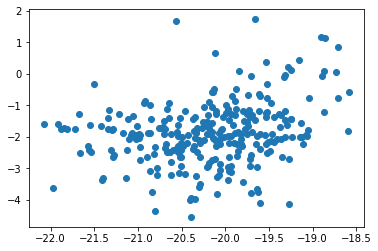

In [6]:
plt.plot(Catalog["Muv"],Catalog["slope"],"o")

In [54]:
galaxy_names_JADES = ["z6_GNW_25971", "z6_GND_29564", "z6_GND_25736", "z6_GND_14309", "z6_GND_44248",
    "z7_GND_15642", "z5_GND_15899", "z5_GND_9333", "z5_GND_42576", "Stark11_43_3982",
    "Jung18_z6_GND_5752"]

galaxy_names_CANDLES=Red["id_charlotte"]


ra_dec_list_JADES = []
for name in galaxy_names_JADES:
    match = Catalog[Catalog['id_charlotte'] == name]
    if len(match) > 0:
        ra_dec_list_JADES.append((match['ra_candels'][0], match['dec_candels'][0]))
    else:
        ra_dec_list_JADES.append((None, None))

ra_dec_list_CANDLES = []
for name in galaxy_names_CANDLES:
    match = Catalog[Catalog['id_charlotte'] == name]
    if len(match) > 0:
        ra_dec_list_CANDLES.append((match['ra_candels'][0], match['dec_candels'][0]))
    else:
        ra_dec_list_CANDLES.append((None, None))
        

In [53]:
Red

id_candels,id_charlotte,ra_candels,dec_candels,KPNO_U_FLUX,LBC_U_FLUX,ACS_F435W_FLUX,ACS_F606W_FLUX,ACS_F775W_FLUX,ACS_F814W_FLUX,ACS_F850LP_FLUX,WFC3_F105W_FLUX,WFC3_F125W_FLUX,WFC3_F140W_FLUX,WFC3_F160W_FLUX,KPNO_U_FLUXERR,LBC_U_FLUXERR,ACS_F435W_FLUXERR,ACS_F606W_FLUXERR,ACS_F775W_FLUXERR,ACS_F814W_FLUXERR,ACS_F850LP_FLUXERR,WFC3_F105W_FLUXERR,WFC3_F125W_FLUXERR,WFC3_F140W_FLUXERR,WFC3_F160W_FLUXERR,z,LyaFlux,LyaErr,LyaFWHM,Skewness,photoz,IDFink,FluxLim,Type,HaFlux,dHaFlux,EWHa,dEWHa,HaFWHM,dHaFWHM,fesc,dfesc,voff,dvoff,zsys,Muv,dMuv,slope,dslope,EWLya,dEWLya,LyaFWHM_int,dLyaFWHM_int,Asymmetry,inFresco,line,f090w_mag_aper_1,f090w_magerr_aper_1,f115w_mag_aper_1,f115w_magerr_aper_1,f150w_mag_aper_1,f150w_magerr_aper_1,f200w_mag_aper_1,f200w_magerr_aper_1,f277w_mag_aper_1,f277w_magerr_aper_1,f335m_mag_aper_1,f335m_magerr_aper_1,f356w_mag_aper_1,f356w_magerr_aper_1,f410m_mag_aper_1,f410m_magerr_aper_1,f444w_mag_aper_1,f444w_magerr_aper_1,Slit_loss?,f090w_mag_aper_2,f090w_magerr_aper_2,f115w_mag_aper_2,f115w_magerr_aper_2,f150w_mag_aper_2,f150w_magerr_aper_2,f200w_mag_aper_2,f200w_magerr_aper_2,f277w_mag_aper_2,f277w_magerr_aper_2,f335m_mag_aper_2,f335m_magerr_aper_2,f356w_mag_aper_2,f356w_magerr_aper_2,f410m_mag_aper_2,f410m_magerr_aper_2,f444w_mag_aper_2,f444w_magerr_aper_2,f090w_tot_2,f090w_etot_2,f115w_tot_2,f115w_etot_2,f150w_tot_2,f150w_etot_2,f200w_tot_2,f200w_etot_2,f277w_tot_2,f277w_etot_2,f335m_tot_2,f335m_etot_2,f356w_tot_2,f356w_etot_2,f410m_tot_2,f410m_etot_2,f444w_tot_2,f444w_etot_2,f435w_tot_2,f435w_etot_2,f606w_tot_2,f606w_etot_2,f770w_tot_2,f770w_etot_2,f775w_tot_2,f775w_etot_2,f814w_tot_2,f814w_etot_2,f850lp_tot_2,f850lp_etot_2,f105w_tot_2,f105w_etot_2,f110w_tot_2,f110w_etot_2,f125w_tot_2,f125w_etot_2,f140w_tot_2,f140w_etot_2,f160w_tot_2,f160w_etot_2,f_F160W,e_F160W,f_U,e_U,f_F435W,e_F435W,f_B,e_B,f_G,e_G,f_V,e_V,f_F606W,e_F606W,f_R,e_R,f_Rs,e_Rs,f_I,e_I,f_F775W,e_F775W,f_Z,e_Z,f_F850LP,e_F850LP,f_F125W,e_F125W,f_J,e_J,f_F140W,e_F140W,f_H,e_H,dLyaFWHM
int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
19700,z5_GND_10574,189.17560915,62.27526508,-99.0,29.65257498915995,nan,30.210822029188925,28.077013962278876,27.80166826542434,26.970113127590125,27.026045662836104,26.89820730429404,26.854435265965115,26.683068392363907,-99.0,0.6038662014913712,nan,1.250549870193403,0.4106590897668454,0.15465887049206373,0.1922786563270691,0.12491393065014478,0.09580198776480131,0.3443758215859276,0.1480931042783169,nan,nan,nan,nan,nan,5.61,nan,-16.538862680593194,NonDetect,-17.80402989561995,-18.719859643795452,271.8102804199184,45.51749153929446,206.5830917774001,50.2131996487733,2.116644694867093,nan,nan,nan,5.300804900483525,-18.689170852496417,0.22441745367679822,

In [56]:
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord


In [60]:
ra_dec_list_CANDLES

[(189.17560915, 62.27526508),
 (189.40362969999998, 62.21986353),
 (189.21553852, 62.31887935)]

z5_GND_10574 189.17560915 62.27526508


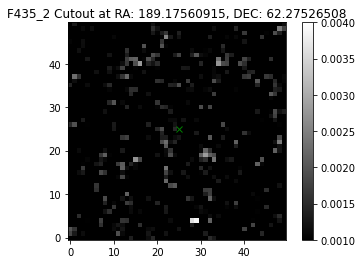

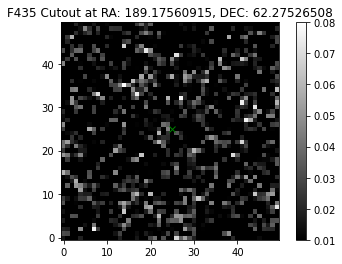

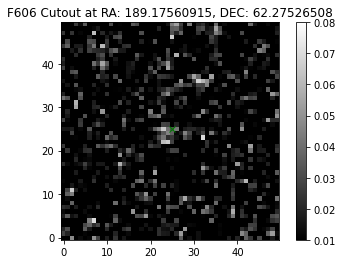

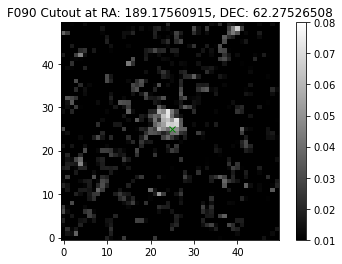

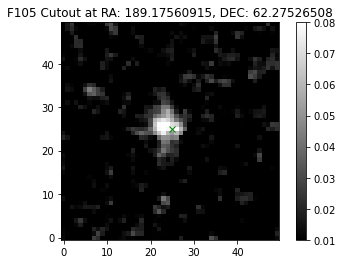

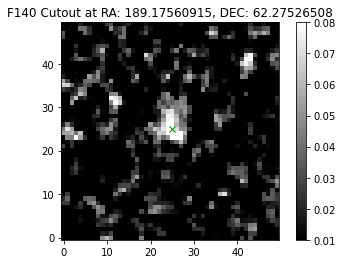

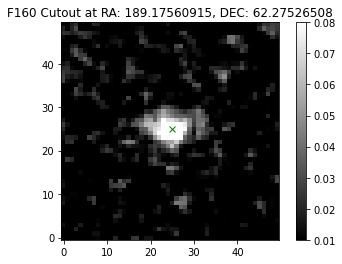

Error with F160_2 cutout: __init__() got an unexpected keyword argument 'CTYPE'
1
z6_GND_29625 189.40362969999998 62.21986353


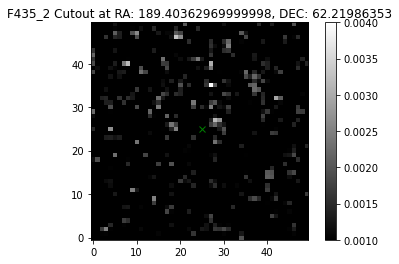

Error with F435 cutout: Arrays do not overlap.
Error with F606 cutout: Arrays do not overlap.
Error with F090 cutout: Arrays do not overlap.
Error with F105 cutout: Arrays do not overlap.
Error with F140 cutout: Arrays do not overlap.
Error with F160 cutout: Arrays do not overlap.
Error with F160_2 cutout: __init__() got an unexpected keyword argument 'CTYPE'
2
z5_GND_6005 189.21553852 62.31887935


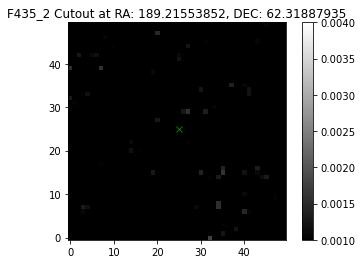

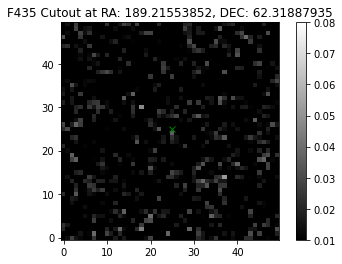

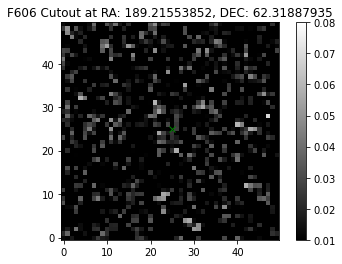

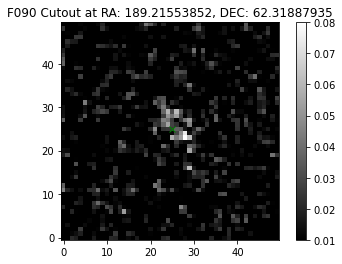

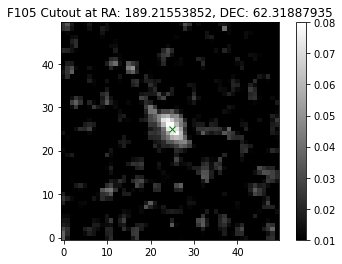

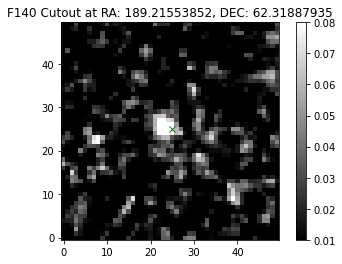

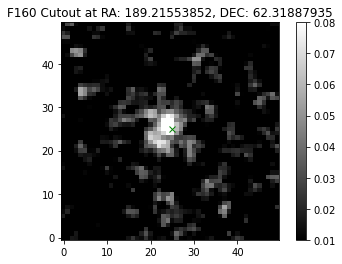

Error with F160_2 cutout: __init__() got an unexpected keyword argument 'CTYPE'
3


In [61]:
f435=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f435w_drc_sci.fits")
f606=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f606w_drc_sci.fits")
f140=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f140w_drz_sci.fits")
f160=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f160w_drz_sci.fits")
f105=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f105w_drz_sci.fits")
f090=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/gdn-grizli-v7.3-f090w-clear_drc_sci.fits")
f435_2=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/hlsp_hlf_hst_acs-30mas_goodsn_f435w_v2.5_sci.fits")
f160_2=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/hlsp_candels_hst_wfc3_gn-tot-60mas_f160w_v1.0_drz.fits")
i=0
for ra, dec in ra_dec_list_CANDLES:
    print(galaxy_names_CANDLES[i], ra, dec)
    position = SkyCoord(ra, dec, frame='fk5', unit='deg')
    size = (50, 50)  # size of the cutout in pixels

    try:
        wcs_f435_2 = WCS(f435_2[0].header)
        cutout = Cutout2D(f435_2[0].data, position, size, wcs=wcs_f435_2)
        plt.imshow(cutout.data, origin='lower', cmap='gray',vmin=0.001,vmax=0.004)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F435_2 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F435_2 cutout: {e}")

    try:
        wcs_f435 = WCS(f435[0].header)
        cutout = Cutout2D(f435[0].data, position, size, wcs=wcs_f435)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F435 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F435 cutout: {e}")

    try:
        wcs_f606 = WCS(f606[0].header)
        cutout = Cutout2D(f606[0].data, position, size, wcs=wcs_f606)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F606 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F606 cutout: {e}")

    try:
        wcs_f090 = WCS(f090[0].header)
        cutout = Cutout2D(f090[0].data, position, size, wcs=wcs_f090)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F090 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F090 cutout: {e}")

    try:
        wcs_f105 = WCS(f105[0].header)
        cutout = Cutout2D(f105[0].data, position, size, wcs=wcs_f105)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F105 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F105 cutout: {e}")

    try:
        wcs_f140 = WCS(f140[0].header)
        cutout = Cutout2D(f140[0].data, position, size, wcs=wcs_f140)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F140 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F140 cutout: {e}")

    try:
        wcs_f160 = WCS(f160[0].header)
        cutout = Cutout2D(f160[0].data, position, size, wcs=wcs_f160)
        plt.imshow(cutout.data, origin='lower', cmap='gray', vmin=0.01, vmax=0.08)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F160 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F160 cutout: {e}")


    try:
        wcs_f160_2 = WCS(f160_2[0].header,CTYPE='RA---TAN')
        cutout = Cutout2D(f160_2[0].data, position, size, wcs=wcs_f160_2)
        plt.imshow(cutout.data, origin='lower', cmap='gray',vmin=0.001,vmax=0.004)
        plt.plot(size[0] / 2, size[1] / 2, 'gx')  # plot green X at the center
        plt.title(f'F160_2 Cutout at RA: {ra}, DEC: {dec}')
        plt.colorbar()
        plt.show()
    except Exception as e:
        print(f"Error with F160_2 cutout: {e}")

    i += 1
    print(i)
    

In [124]:
f435_2=fits.open("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/Images/hlsp_hlf_hst_acs-30mas_goodsn_f435w_v2.5_sci.fits")
